In [1]:
%matplotlib inline

# OpenCV-Python utiliza NumPy para el manejo de imágenes
import numpy as np
# cv2 es el módulo python para acceder a OpenCV 
import cv2 as cv
# Usamos las poderosas herramientas de graficación de matplotlib para mostrar imágenes, perfiles, histogramas, etc
import matplotlib.pyplot as plt

In [2]:
import math

In [3]:
def imprimir(img):
  plt.figure(1)
  plt.imshow(img)
  plt.show()

#Pasaje a coordenadas cromáticas

In [4]:
#algoritmo de pasaje a coordenas cromáticas
#recibe el nombre del archivo de una que debe estar preciamente cargado, lo lee como imagen, lo pasa a RGB y lo pasa a coordenadas cromáticas

def coord_crom(nombre_archivo):

  #leer la url 
  input = cv.imread(nombre_archivo)
  #se leyó como BGR, pasarla a RGB
  input = cv.cvtColor(input, cv.COLOR_BGR2RGB)
  #crear una matriz donde cada elemento sea la suma de la posición en cada uno de los canales RGB
  divi = input.sum(axis = 2)
  #si algun pixel tiene cero en los 3 canales => div[pixel] = 0; como 0/0 es indet, asigno div[pixel] = 1, así en ese ese caso tengo 0/1(=0)
  divi[divi == 0] = 1
  #transformar la matriz en un tensor de una sola matriz así no tener problemas con el broadcasting
  divi = np.expand_dims(divi, axis=2)
  #dividir cada elemento de cada canal robre el divisor y multiplicarlo por 255
  salida = (input/divi)*255
  #paso a uint8
  salida = salida.astype('uint8')
  
  return salida

In [5]:
crom1 = coord_crom('CoordCrom_1.png')
crom2 = coord_crom('CoordCrom_2.png')
crom3 = coord_crom('CoordCrom_3.png')

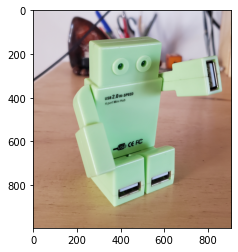

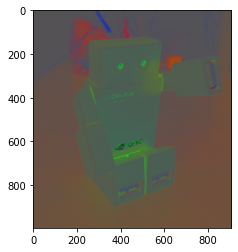

In [6]:
imprimir(cv.cvtColor(cv.imread('CoordCrom_1.png'), cv.COLOR_BGR2RGB))
imprimir(crom1)

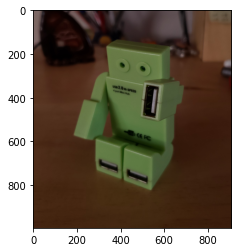

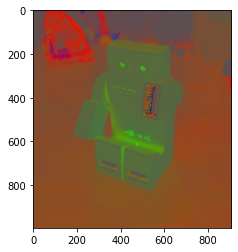

In [7]:
imprimir(cv.cvtColor(cv.imread('CoordCrom_2.png'), cv.COLOR_BGR2RGB))
imprimir(crom2)

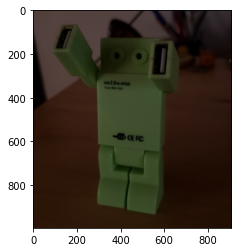

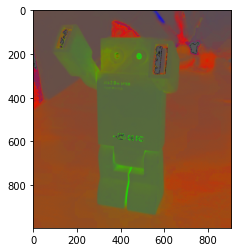

In [8]:
imprimir(cv.cvtColor(cv.imread('CoordCrom_3.png'), cv.COLOR_BGR2RGB))
imprimir(crom3)

#implementar algoritmo White Patch

In [9]:
#algoritmo white patch

def white_patch(nombre_archivo):

  #leer archivo como imagen
  input = cv.imread(nombre_archivo)
  #pasarlo a RGB
  input = cv.cvtColor(input, cv.COLOR_BGR2RGB)
  #extraer el máximo de cada canal
  max_canales = [np.max(input[:,:,0]) , np.max(input[:,:,1]), np.max(input[:,:,2])]
  #crear el output siendo una matriz de ceros del mismo tamaño que la imagen de entrada
  salida = np.zeros_like(input)
  #aplico forula de white patch a los pixeles de  mi entrada
  for i in range(3):
    salida[:,:,i] = (input[:,:,i]/max_canales[i])*255
  #paso a uint8
  salida = salida.astype('uint8')

  return salida 

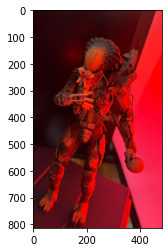

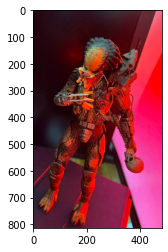

In [10]:
wp_red = cv.cvtColor(cv.imread('wp_red.png'), cv.COLOR_BGR2RGB)
imprimir(wp_red)
imprimir(white_patch('wp_red.png'))

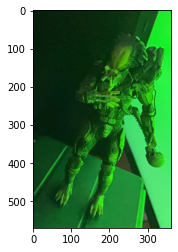

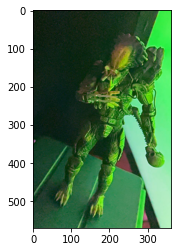

In [11]:
wp_green = cv.cvtColor(cv.imread('wp_green.png'), cv.COLOR_BGR2RGB)
imprimir(wp_green)
imprimir(white_patch('wp_green.png'))

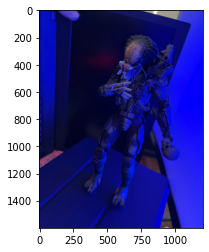

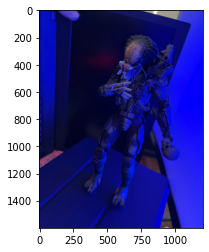

In [12]:
wp_blue = cv.cvtColor(cv.imread('wp_blue.jpg'), cv.COLOR_BGR2RGB)
imprimir(wp_blue)
imprimir(white_patch('wp_blue.jpg'))

## En estas imágenes observo el efecto en las de luz roja y verde, donde se resalta el color original de la pieza. Pero lo mismo no sucede con la imagen 'wp_blue'

analizo los maximos de los canales de cada imagen:


In [13]:
for i in range(3):
  print(np.max(wp_red[:,:,i]))

255
134
122


In [14]:
for i in range(3):
  print(np.max(wp_blue[:,:,i]))

255
255
255


In [15]:
for i in range(3):
  print(np.max(wp_green[:,:,i]))

126
252
155


identifico en la imagen azul que el máximo de cada canal es 255 (saturados), pruebo que pasa si en lugar de uzar Rmax, Gmax, Bmax, uso un porcentaje de ellos

In [16]:
def white_patch_alt(nombre_archivo, porcentaje):

  #leer archivo como imagen
  input = cv.imread(nombre_archivo)
  #pasarlo a RGB
  input = cv.cvtColor(input, cv.COLOR_BGR2RGB)
  #extraer el máximo de cada canal
  max_canales = [np.max(input[:,:,0]) , np.max(input[:,:,1]), np.max(input[:,:,2])]
  #altero los máximos en un porcentaje de los mismos
  max_canales = np.array(max_canales) * porcentaje
  #crear el output siendo una matriz de ceros del mismo tamaño que la imagen de entrada
  salida = np.zeros_like(input)
  #aplico forula de white patch a los pixeles de  mi entrada
  for i in range(3):
    salida[:,:,i] = (input[:,:,i]/max_canales[i])*255
  #paso a uint8
  salida = salida.astype('uint8')

  return salida 

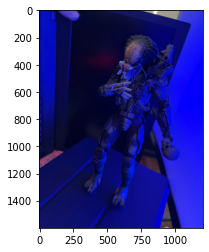

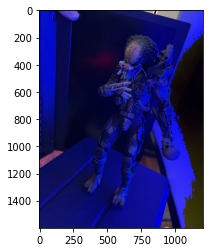

In [17]:
# pruebo con 95%
imprimir(wp_blue)
wp_blue_porcion_alt = white_patch_alt('wp_blue.jpg', 0.95)
imprimir(wp_blue_porcion_alt)

no observo notoria mejoría en el color del depredador, pero observo un cambio en la parte derecha de la imagen

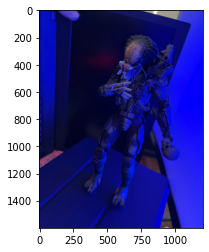

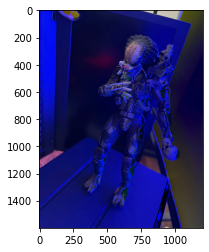

In [18]:
imprimir(wp_blue)
wp_blue_porcion_alt = white_patch_alt('wp_blue.jpg', 0.80)
imprimir(wp_blue_porcion_alt)

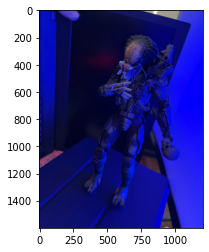

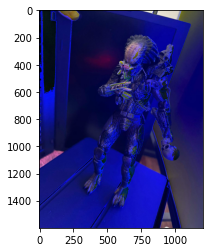

In [19]:
imprimir(wp_blue)
wp_blue_porcion_alt = white_patch_alt('wp_blue.jpg', 0.70)
imprimir(wp_blue_porcion_alt)

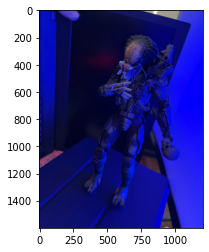

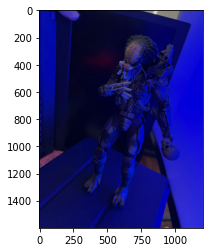

In [20]:
imprimir(wp_blue)
wp_blue_porcion_alt = white_patch_alt('wp_blue.jpg', 1.15)
imprimir(wp_blue_porcion_alt)

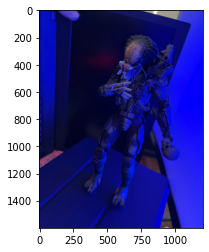

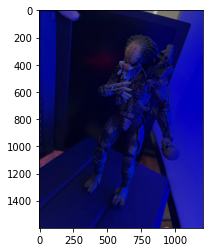

In [21]:
imprimir(wp_blue)
wp_blue_porcion_alt = white_patch_alt('wp_blue.jpg', 1.3)
imprimir(wp_blue_porcion_alt)

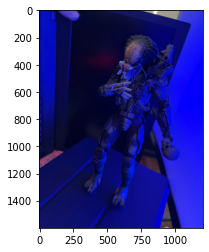

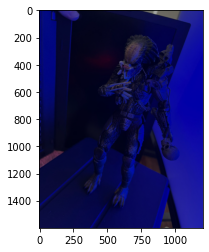

In [22]:
imprimir(wp_blue)
wp_blue_porcion_alt = white_patch_alt('wp_blue.jpg', 1.50)
imprimir(wp_blue_porcion_alt)

cuando el porcentaje es menor al 100% observo la imagen cada vez mas clara, y cuando es mayor cada vez mas oscura

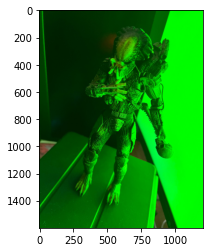

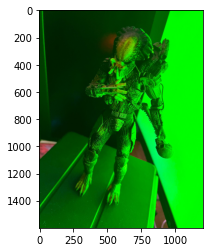

In [23]:
wp_green = cv.cvtColor(cv.imread('wp_green2.jpg'), cv.COLOR_BGR2RGB)
imprimir(wp_green)
imprimir(white_patch('wp_green2.jpg'))

aquí observo algo similar a la imagen azul, no distingo el cambio

In [24]:
for i in range(3):
  print(np.max(wp_green[:,:,i]))

170
255
172


pruebo usando white_patch_alt

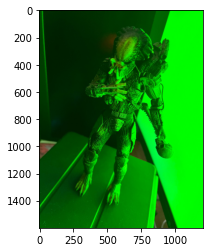

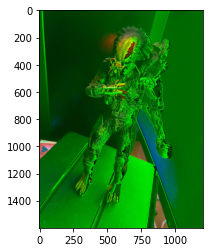

In [25]:
wp_green = cv.cvtColor(cv.imread('wp_green2.jpg'), cv.COLOR_BGR2RGB)
imprimir(wp_green)
imprimir(white_patch_alt('wp_green2.jpg', 0.7))

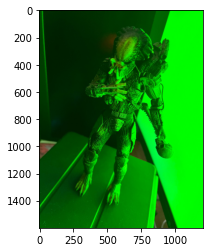

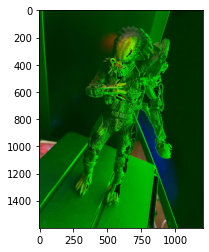

In [26]:
wp_green = cv.cvtColor(cv.imread('wp_green2.jpg'), cv.COLOR_BGR2RGB)
imprimir(wp_green)
imprimir(white_patch_alt('wp_green2.jpg', 0.85))

tal vez el problema en este caso sea la iluminación verde y el color verde del depredador

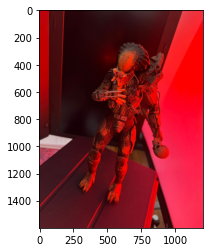

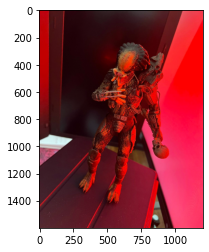

In [27]:
wp_red2 = cv.cvtColor(cv.imread('wp_red2.jpg'), cv.COLOR_BGR2RGB)
imprimir(wp_red2)
imprimir(white_patch('wp_red2.jpg'))

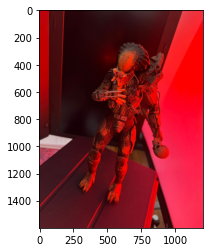

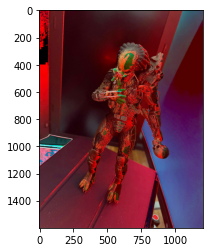

In [28]:
imprimir(wp_red2)
imprimir(white_patch_alt('wp_red2.jpg', 0.75))

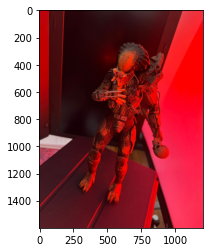

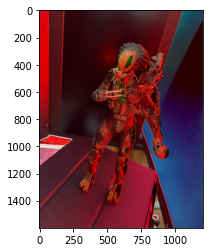

In [29]:
imprimir(wp_red2)
imprimir(white_patch_alt('wp_red2.jpg', 0.85))

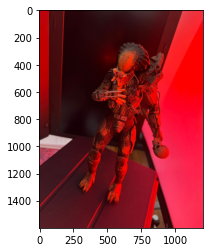

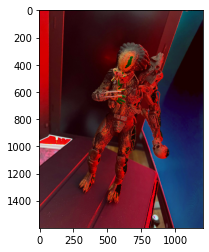

In [30]:
imprimir(wp_red2)
imprimir(white_patch_alt('wp_red2.jpg', 0.90))

In [31]:
test_blue = cv.cvtColor(cv.imread('test_blue.png'), cv.COLOR_BGR2RGB)
test_green = cv.cvtColor(cv.imread('test_green.png'), cv.COLOR_BGR2RGB)
test_red = cv.cvtColor(cv.imread('test_red.png'), cv.COLOR_BGR2RGB)

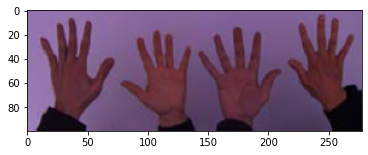

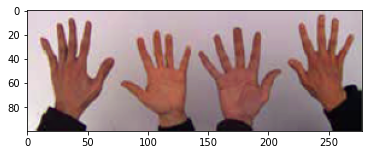

In [32]:
imprimir(test_blue)
imprimir(white_patch('test_blue.png'))

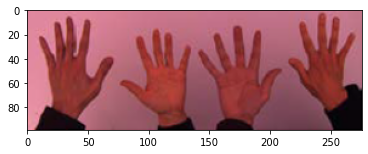

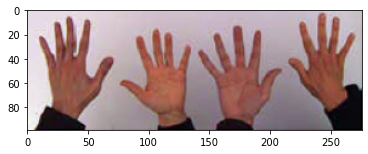

In [33]:
imprimir(test_red)
imprimir(white_patch('test_red.png'))

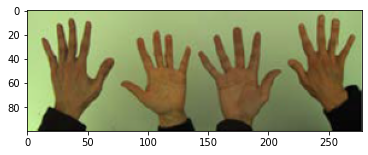

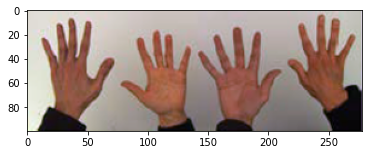

In [34]:
imprimir(test_green)
imprimir(white_patch('test_green.png'))

Observamos un output aproximadamente igual para los tres casos

#Grises

In [35]:
img1 = cv.imread('img1_tp.png')

In [36]:
img1.shape

(288, 287, 3)

In [37]:
grises1 = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)

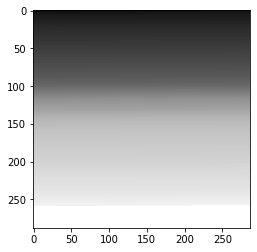

In [38]:
plt.figure(1)
plt.imshow(grises1, cmap='gray')
plt.show()

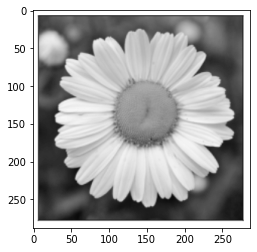

In [39]:
img2 = cv.imread('img2_tp.png')
grises2 = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)
plt.figure(1)
plt.imshow(grises2, cmap='gray')
plt.show()

##histogramas

imagen 1:


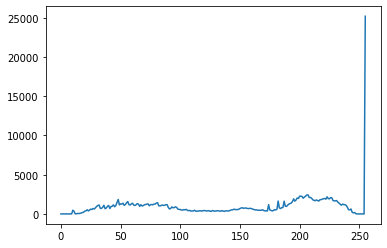

In [41]:
plt.figure(1)
hist1,bins1 = np.histogram(img1.ravel(),bins = 256, range= [0,256])
ax1=plt.subplot()
ax1.plot(hist1)

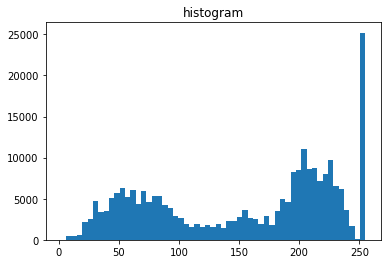

In [51]:
plt.hist(img1.ravel(), bins = "auto") 
plt.title("histogram") 
plt.show()

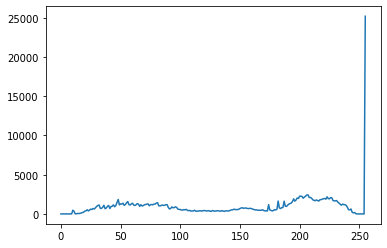

In [42]:
plt.figure(1)
hist2,bins2 = np.histogram(img2.ravel(),bins = 256, range= [0,256])
ax2=plt.subplot()
ax2.plot(hist2)

In [44]:
type(hist1)

numpy.ndarray

In [47]:
hist1.shape

(256,)

In [49]:
np.min(hist1 - hist2)

0

In [50]:
np.max(hist1 - hist2)

0

Grafiqué los histogramas en 256 bins (0 a 255) así poder ver si las imagenes ya tenía algun preprocesamiento. Al visulaizar el gráfico continuo en el histograma observo que no hubo preprocesamiento, y la haber analizado la diferencia entre los arrays que generan el histograma y observar que es nula reconozco que es el mismo; es decir tengo la misma cantidad de pixeles en cada tonalidad de gris en ambas imágenes. 

Considero que estos histogramas no son útiles como features para entrenar un modelo debido a la alta cantidad de bins con valores no nulos. Entiendo que utlizar el hisotgrama de la imagen sin procesar podría conducir a sobreajustar el modelo a la entrada. En caso de tener el histograma con de una imagen con un procesamiento que reduzca la cantidad de intensidades (bins) posibles sería útil para utilizar como dato de entrenamiento.


#Segmentación

In [4]:
img_seg = cv.imread('segmentacion.png') 

In [69]:
img_RGB = cv.cvtColor(img_seg, cv.COLOR_BGR2RGB)

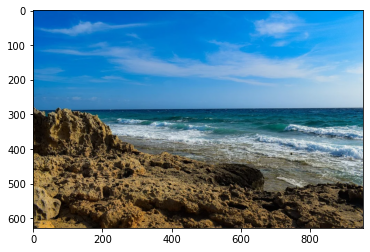

In [6]:
imprimir(img_RGB)

In [7]:
imgHSV = cv.cvtColor(img_RGB, cv.COLOR_RGB2HSV)

escojo el perfil 580

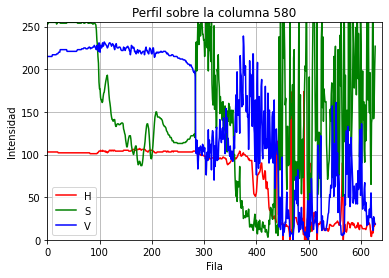

In [8]:
idx_col = 580
perfil_color = imgHSV[:, idx_col]
plt.plot(perfil_color[:,0], color='r',label='H')
plt.plot(perfil_color[:,1], color='g',label='S')
plt.plot(perfil_color[:,2], color='b',label='V')
plt.xlabel('Fila')
plt.ylabel('Intensidad')
plt.title('Perfil sobre la columna {}'.format(idx_col))
plt.grid()
plt.xlim(0,640)
plt.ylim(0,255)
plt.legend()
plt.show()

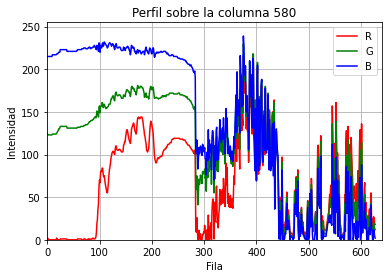

In [9]:
idx_col = 580
perfil_color = img_RGB[:, idx_col]
plt.plot(perfil_color[:,0], color='r',label='R')
plt.plot(perfil_color[:,1], color='g',label='G')
plt.plot(perfil_color[:,2], color='b',label='B')
plt.xlabel('Fila')
plt.ylabel('Intensidad')
plt.title('Perfil sobre la columna {}'.format(idx_col))
plt.grid()
plt.xlim(0,640)
plt.ylim(0,255)
plt.legend()
plt.show()

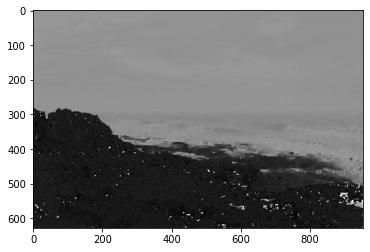

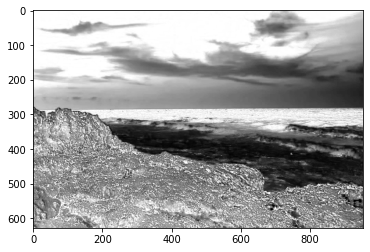

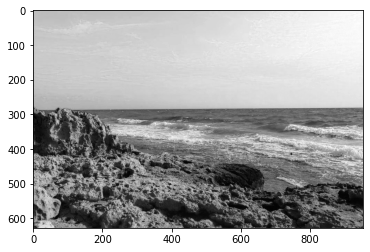

In [10]:
im_h, im_s, im_v = cv.split(imgHSV)

plt.imshow(im_h, cmap='gray')
plt.show()

plt.imshow(im_s,cmap='gray')
plt.show()

plt.imshow(im_v,cmap='gray')
plt.show()


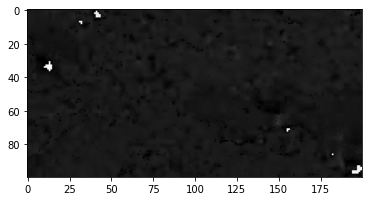

In [66]:
muestra_tierra = im_h[500:600, 200:400]
plt.figure()
plt.imshow(muestra_tierra, cmap='gray')
plt.show()


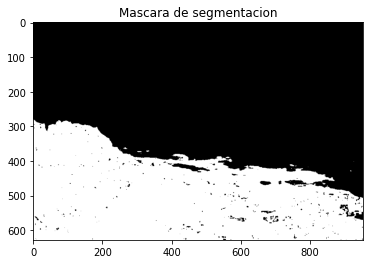

In [67]:
media_tierra = np.mean(muestra_tierra, axis=(0,1))
color_l_tierra = media_tierra-25
color_u_tierra = media_tierra+25
mask_tierra = cv.inRange(im_h, color_l_tierra,  color_u_tierra)
plt.imshow(mask_tierra, cmap='gray')
plt.title('Mascara de segmentacion')
plt.show()

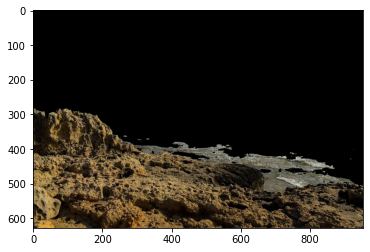

In [70]:
res = cv.bitwise_and(img_RGB,img_RGB,mask = mask_tierra)
imprimir(res)

agua

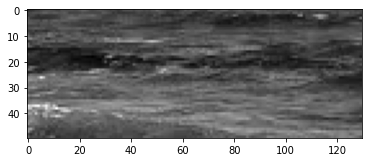

In [72]:
muestra_agua = im_v[300:350, 520:650]
plt.figure()
plt.imshow(muestra_agua, cmap='gray')
plt.show()

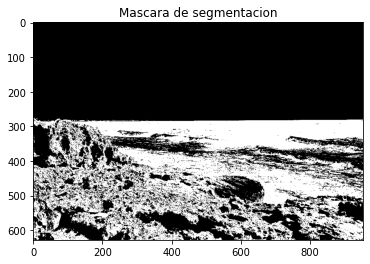

In [88]:
media_agua = np.mean(muestra_agua, axis=(0,1))
color_l = media_agua-60
color_u = media_agua+60
mask_agua = cv.inRange(im_v, color_l,  color_u)
plt.imshow(mask_agua, cmap='gray')
plt.title('Mascara de segmentacion')
plt.show()

In [89]:
tierra_invert = cv.bitwise_not(mask_tierra)

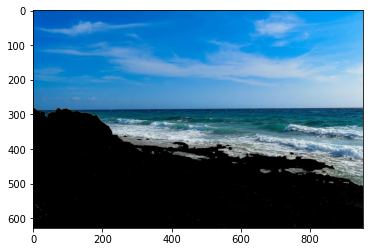

In [90]:
salida = cv.bitwise_and(img_RGB, img_RGB, mask = tierra_invert)
imprimir(salida)

##Segementación agua:

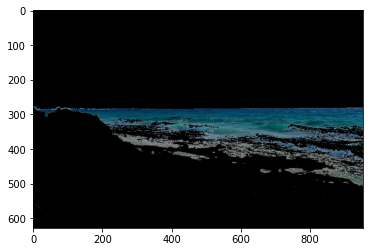

In [91]:
salida_agua = cv.bitwise_and(salida, salida, mask = mask_agua)
imprimir(salida_agua)

# Segmentación cielo:

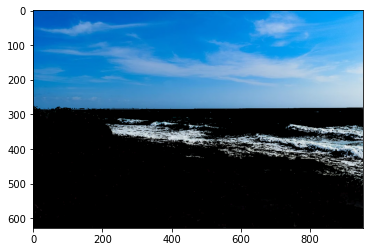

In [92]:
agua_invert = cv.bitwise_not(mask_agua)
cielo = cv.bitwise_and(img_RGB, img_RGB, mask = tierra_invert)
cielo = cv.bitwise_and(cielo, cielo, mask = agua_invert)
imprimir(cielo)
